### References:

https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF

Convolutional Neural Networks (Course 4 of the Deep Learning Specialization) - DeepLearningAI - Andrew Ng

https://baozoulin.gitbook.io/neural-networks-and-deep-learning/

In [1]:
# import tensorflow as tf

The h5py package is a Pythonic interface to the HDF5 binary data format.

HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

numpy.pad(array, pad_width, mode='constant', **kwargs) - pad an array

if you want to pad the array "a" of shape  (5,5,5,5,5) with pad = 1 for the 2nd dimension, pad = 3 for the 4th dimension and pad = 0 for the rest, you would do:

a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = (..,..))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Zero-padding
Zero-padding adds zeros around the border of an image:

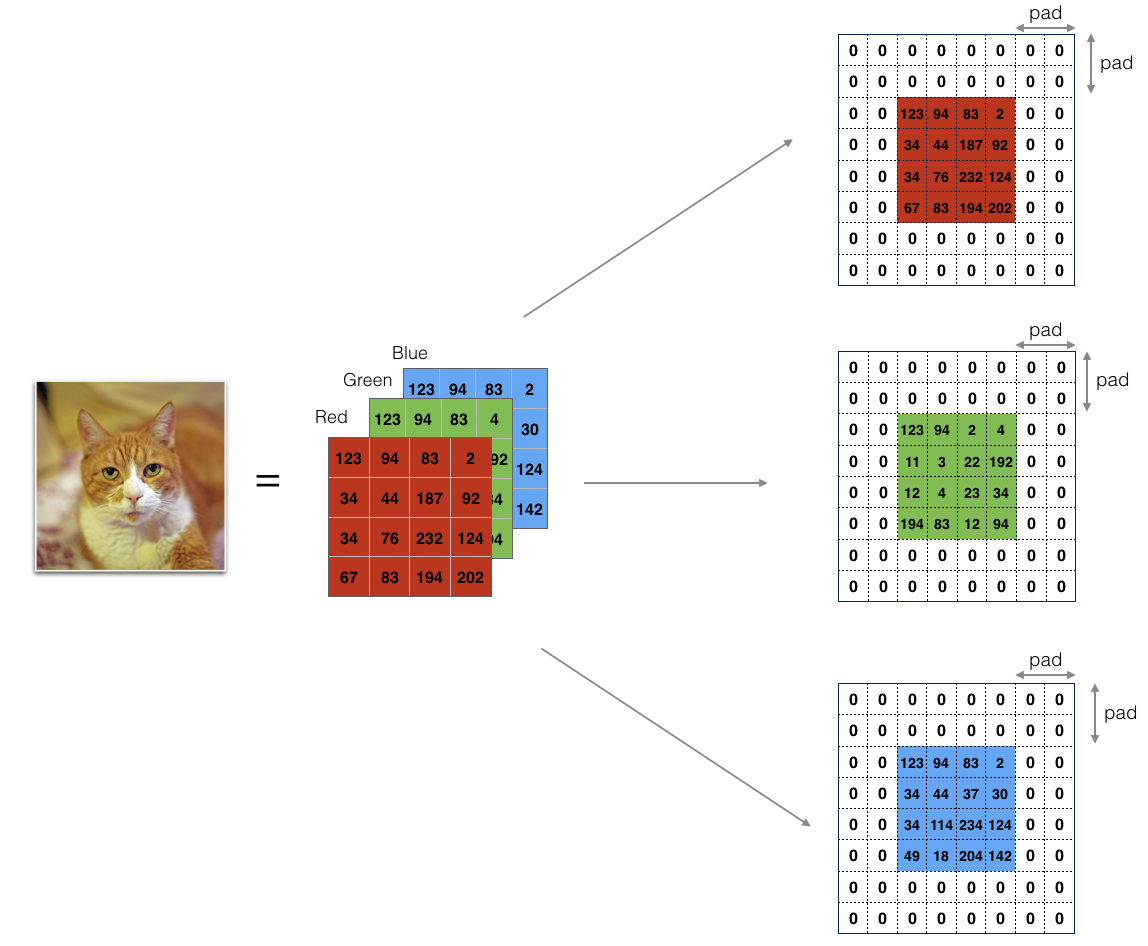

The main benefits of padding are the following:
* It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.
* It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.

Exercise: Implement the following function, which pads all the images of a batch of examples X with zeros. Use np.pad. 

Note if you want to pad the array "a" of shape (5, 5, 5, 5, 5) with pad = 1 for the 2nd dimension, pad = 3 for the 4th dimension and pad = 0 for the rest, you would do:

In [ ]:
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = (..,..))

In [3]:
# use np.pad
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image
    Arguments:
    - X: np array of shape (m, n_H, n_W, n_C) representing a batch of m images
    - pad: integer, the amount of padding around each image on vertical and horizontal dimensions
    Returns:
    - X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)    
    return X_pad

In [130]:
# def zero_pad(X, pad):
#     N, H, W, C = X.shape
#     X_pad = np.zeros((N, H + 2*pad, W + 2*pad, C))
#     for i in range(N):
#         X_pad[i, pad:-pad, pad:-pad, :] = X[i]
#     return X_pad  #.astype('uint8')

In [7]:
from tensorflow import keras

In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [136]:
X_pad = zero_pad(X_test, 2)

In [137]:
X_pad.shape

(10000, 36, 36, 3)

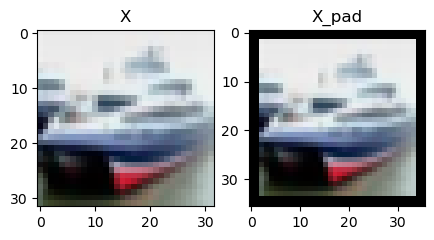

In [139]:
plt.subplot(1, 2, 1)
plt.imshow(X_test[1])
plt.title('X')
plt.subplot(1, 2, 2)
plt.imshow(X_pad[1].astype('uint8'))
plt.title('X_pad');

In [41]:
# Testing
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 1)

In [42]:
x_pad.shape

(4, 5, 5, 2)

In [134]:
x[1, 1]

array([[ 0.90085595, -0.68372786],
       [-0.12289023, -0.93576943],
       [-0.26788808,  0.53035547]])

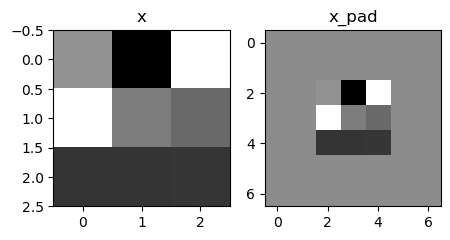

In [142]:
plt.subplot(1, 2, 1)
plt.imshow(x[1, :, :, 0])
plt.title('x')
plt.subplot(1, 2, 2)
plt.imshow(x_pad[1, :, :, 0])
plt.title('x_pad');

In [4]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation of the previous layer
    Arguments:
    - a_slice_prev: slice of input data of shape (f, f, n_C_prev)
    - W: weights parameters contained in a window - matrix of shape (f, f, n_C_prev)
    - b: bias parameters contained in a window - matrix of shape (1, 1, 1)
    """
    s = np.multiply(a_slice_prev, W)
    Z = np.sum(s)
    Z = Z + float(b.reshape(1,)[0])
    return Z

In [26]:
# Testing
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
Z

-6.999089450680221

In [21]:
a_slice_prev

array([[[ 1.62434536, -0.61175641, -0.52817175],
        [-1.07296862,  0.86540763, -2.3015387 ],
        [ 1.74481176, -0.7612069 ,  0.3190391 ],
        [-0.24937038,  1.46210794, -2.06014071]],

       [[-0.3224172 , -0.38405435,  1.13376944],
        [-1.09989127, -0.17242821, -0.87785842],
        [ 0.04221375,  0.58281521, -1.10061918],
        [ 1.14472371,  0.90159072,  0.50249434]],

       [[ 0.90085595, -0.68372786, -0.12289023],
        [-0.93576943, -0.26788808,  0.53035547],
        [-0.69166075, -0.39675353, -0.6871727 ],
        [-0.84520564, -0.67124613, -0.0126646 ]],

       [[-1.11731035,  0.2344157 ,  1.65980218],
        [ 0.74204416, -0.19183555, -0.88762896],
        [-0.74715829,  1.6924546 ,  0.05080775],
        [-0.63699565,  0.19091548,  2.10025514]]])

In [22]:
W

array([[[ 0.12015895,  0.61720311,  0.30017032],
        [-0.35224985, -1.1425182 , -0.34934272],
        [-0.20889423,  0.58662319,  0.83898341],
        [ 0.93110208,  0.28558733,  0.88514116]],

       [[-0.75439794,  1.25286816,  0.51292982],
        [-0.29809284,  0.48851815, -0.07557171],
        [ 1.13162939,  1.51981682,  2.18557541],
        [-1.39649634, -1.44411381, -0.50446586]],

       [[ 0.16003707,  0.87616892,  0.31563495],
        [-2.02220122, -0.30620401,  0.82797464],
        [ 0.23009474,  0.76201118, -0.22232814],
        [-0.20075807,  0.18656139,  0.41005165]],

       [[ 0.19829972,  0.11900865, -0.67066229],
        [ 0.37756379,  0.12182127,  1.12948391],
        [ 1.19891788,  0.18515642, -0.37528495],
        [-0.63873041,  0.42349435,  0.07734007]]])

In [23]:
np.multiply(a_slice_prev, W)

array([[[ 0.19517964, -0.37757796, -0.15854148],
        [ 0.37795303, -0.98874397,  0.80402579],
        [-0.36448112, -0.44654162,  0.26766851],
        [-0.23218928,  0.41755949, -1.82351535]],

       [[ 0.24323087, -0.48116947,  0.58154416],
        [ 0.32786971, -0.08423431,  0.06634126],
        [ 0.04777032,  0.88577236, -2.40548621],
        [-1.59860247, -1.30199961, -0.25349124]],

       [[ 0.14417035, -0.5990611 , -0.03878845],
        [ 1.89231409,  0.0820284 ,  0.43912088],
        [-0.1591475 , -0.30233062,  0.15277783],
        [ 0.16968185, -0.12522861, -0.00519314]],

       [[-0.22156233,  0.02789749, -1.11316672],
        [ 0.280169  , -0.02336965, -1.00256263],
        [-0.89578144,  0.31336883, -0.01906739],
        [ 0.40686849,  0.08085163,  0.16243388]]])

In [24]:
np.sum(np.multiply(a_slice_prev, W))

-6.655235775109145

In [27]:
b

array([[[-0.34385368]]])

### Convolutional Neural Networks - Forward Pass
In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume.


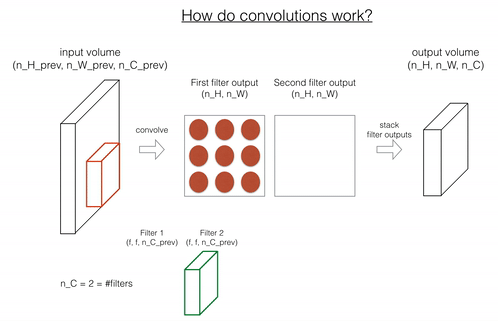

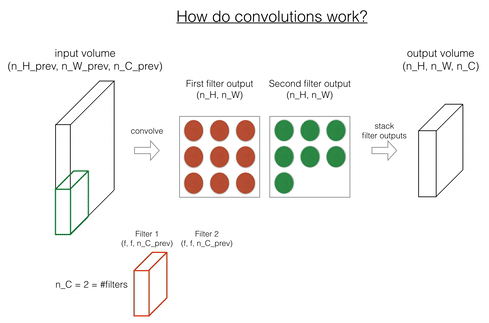

Implement a function to convolve the filters W on an input activation A_prev. This function takes as input A_prev, the activation output by the previous layer (for a batch of m inputs), F filters/weights denoted by W, and a bias vector denoted by b, where each filter has its own (single) bias. Finally you also have access to the hyperparameters dictionary which contains the stride and the padding.

In [29]:
# 'where each filter has its own (single) bias', ex biases for n_C = 2 (# filters)
np.random.randn(1, 1, 1, 2)

array([[[[ 0.69803203, -0.44712856]]]])

The formulas relating the output shape of the convolution to the input shape is:

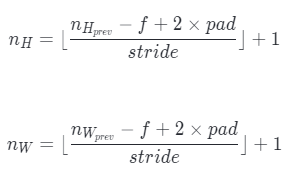

In [5]:
def conv_forward(A_prev, W, b, hparams):
    """
    Implement the forward propagation for a convolution function
    Arguments:
    - A_prev: output activations of the previous layer, np array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    - W: Weights, np array of shape (f, f, n_C_prev, n_C)
    - b: Biases, np array of shape(1, 1, 1, n_C)
    - hparams: python dictionary containing 'stride' and 'pad'
    Returns:
    - Z: convolution output, np array of shape (m, n_H, n_W, n_C)
    - cache: cache of values needed for the conv_backward() function
    """
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    f, f, n_C_prev, n_C = W.shape
    stride = hparams['stride']
    pad = hparams['pad']

    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1

    Z = np.zeros((m, n_H, n_W, n_C))
    A_prev_pad = zero_pad(A_prev, pad)
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])
                    
    assert(Z.shape == (m, n_H, n_W, n_C))

    # save information in 'cache' for the backpropagation
    cache = (A_prev, W, b, hparams)

    return Z, cache

In [6]:
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparams = {'stride': 2, 'pad': 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparams)

In [53]:
Z.shape

(10, 4, 4, 8)

In [55]:
print("Z's mean =", np.mean(Z))
print("Z[3, 2, 1] =", Z[3, 2, 1])   # Z[3, 2, 1] would represent a specific value at the position (3, 2, 1, :) in the original Z (4D array)
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.048995203528855794
Z[3, 2, 1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [58]:
Z[3][2]

array([[ 0.37245685, -0.1484898 , -0.1834002 ,  1.1010002 ,  0.78002714,
        -0.6294416 , -1.1134361 , -0.06741002],
       [-0.61490741, -6.7439236 , -2.55153897,  1.75698377,  3.56208902,
         0.53036437,  5.18531798,  8.75898442],
       [ 0.88940371, -3.43419921,  0.77799158,  0.63687584, -3.66068778,
         4.24711545, -2.27016527,  0.58299186],
       [ 0.37245685, -0.1484898 , -0.1834002 ,  1.1010002 ,  0.78002714,
        -0.6294416 , -1.1134361 , -0.06741002]])

A convolution layer should also contain an activation, in which case we would add the following line of code:

In [ ]:
# apply activation()
A[i, h, w, c] = activation(Z[i, h, w, c])

### Pooling Layer
The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are:
* Max-pooling layer: slides an (f, f) window over the input and stores the max value of the window in the output
* Average-pooling layer: slides an (f, f) window over the input and stores the average value of the window in the output

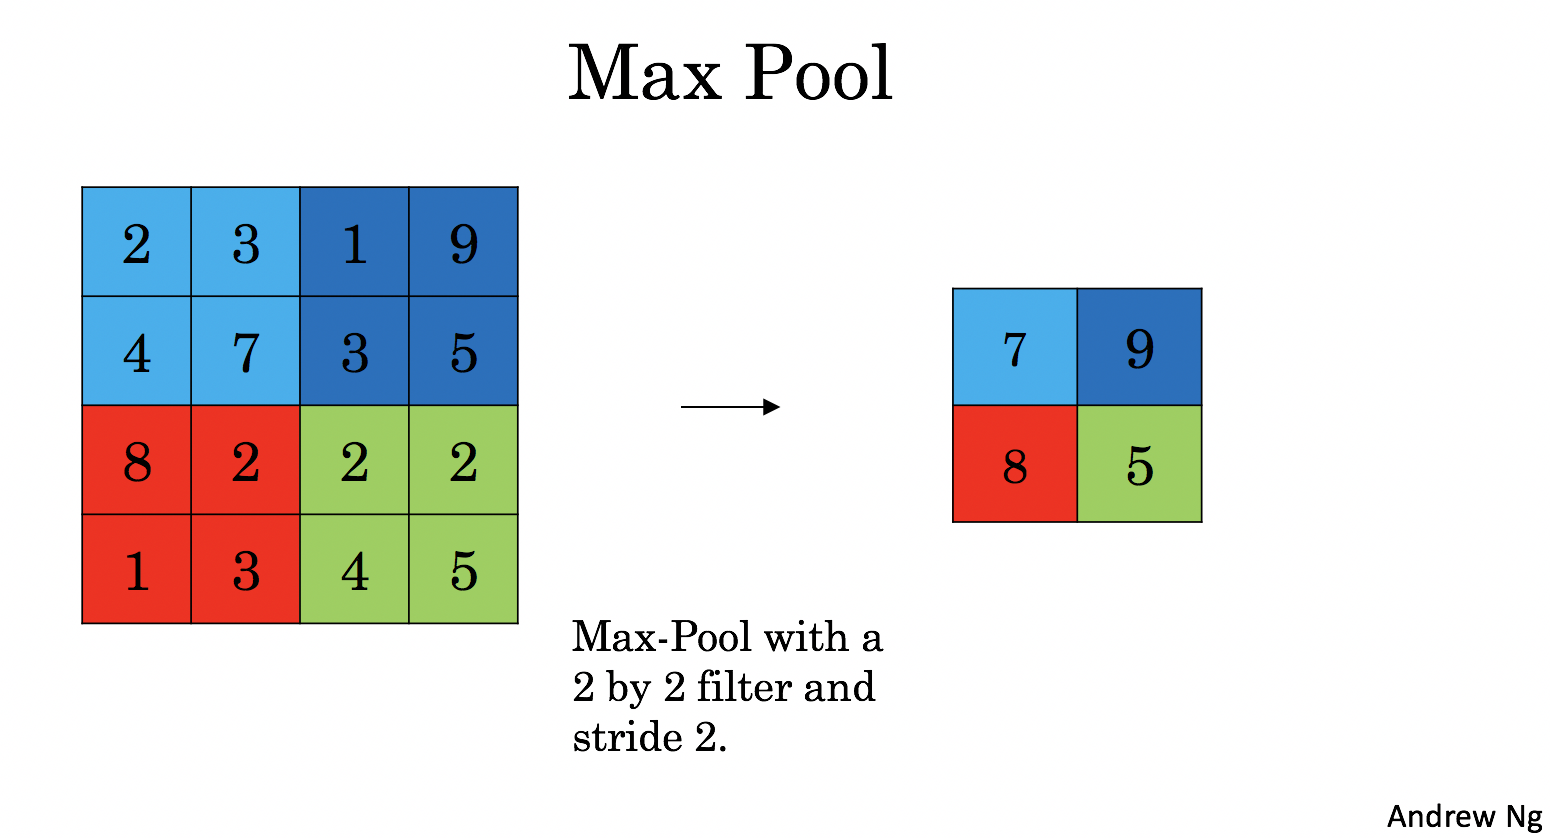

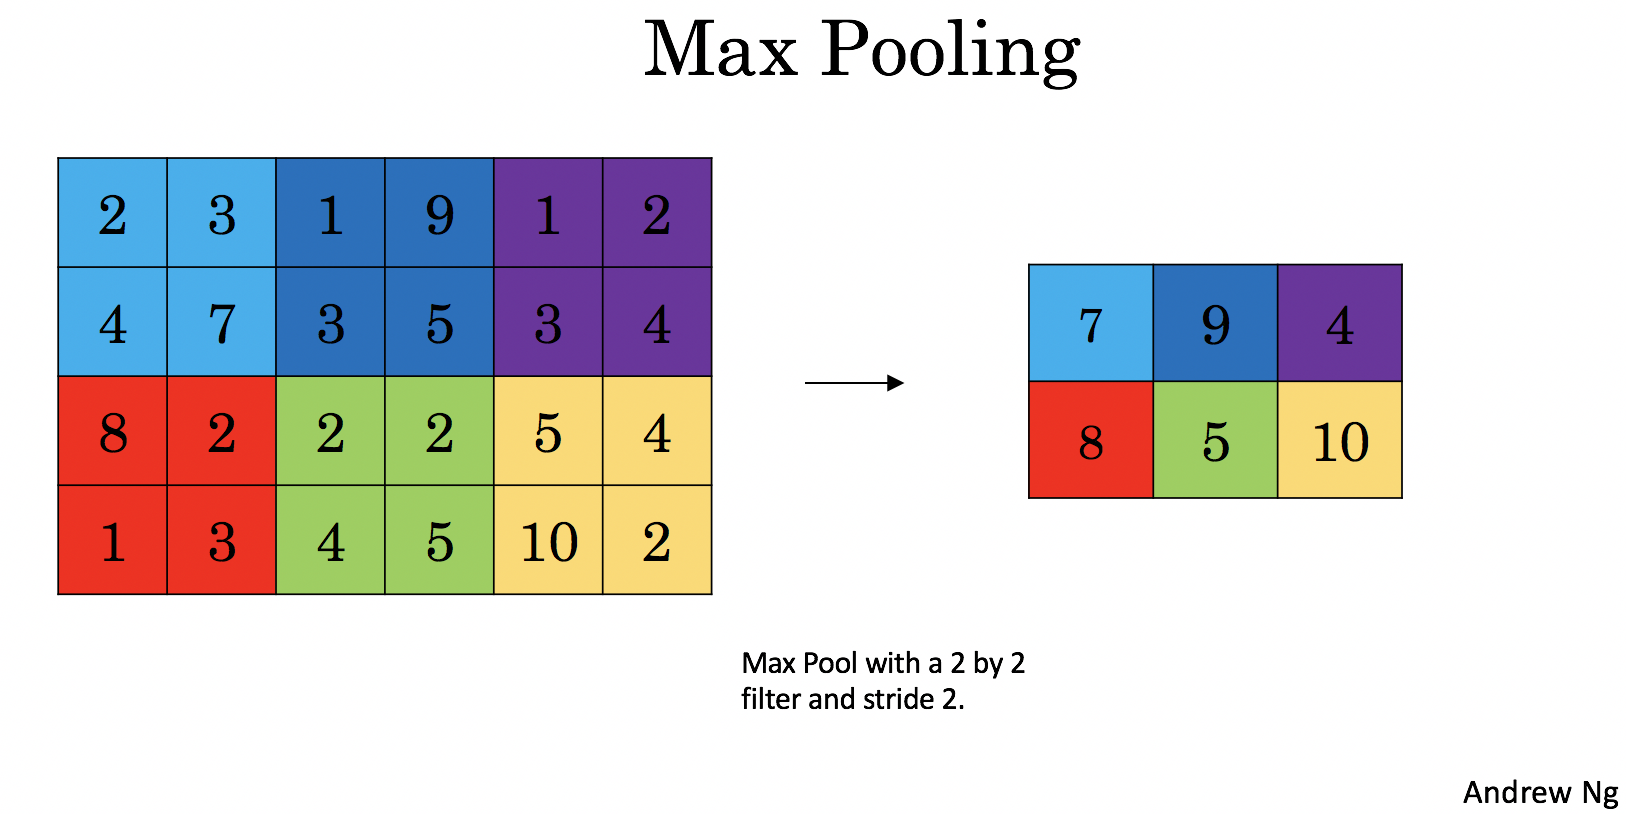

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size f. This specifies the height and width of the (f x f) window you would compute a max or average over.

### Forward Pooling
Now, you're going to implement MAX-POOL and AVG-POOL, in the same function.

As there is no padding, the formulas binding the output shape of the pooling to the input shape is:

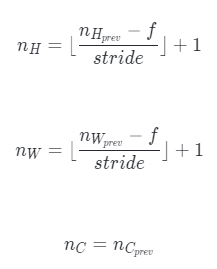

In [7]:
def pool_forward(A_prev, hparams, mode='max'):
    """
    Implements the forward pass of the pooling layer
    Arguments:
    - A_prev: input data, np array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    - hparams: python dictionary containing 'stride' and 'f'
    - mode: the pooling mode, defined as string ('max or 'average')
    Returns:
    - A: output of the pool layer, np array of shape (m, n_H, n_W, n_C)
    - cache: cache used in the backward pass of the pooling layer, contains the input: A_prev, and hparams
    """
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    f = hparams['f']
    stride = hparams['stride']

    n_H = int(1 + (n_H_prev - f)/stride)
    n_W = int(1 + (n_W_prev - f)/stride)
    n_C = n_C_prev
    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    # find the corners of the current slice
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    # compute the pooling operation on the slice
                    if mode == 'max':
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == 'average':
                        A[i, h, w, c] = np.mean(a_prev_slice)

    assert(A.shape == (m, n_H, n_W, n_C))
    cache = A_prev, hparams
    
    return A, cache 

In [8]:
# Testing
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparams = {'stride': 2, 'f': 3}

A, cache = pool_forward(A_prev, hparams, mode='max')

In [63]:
print(A.shape)
A

(2, 1, 1, 3)


array([[[[1.74481176, 0.86540763, 1.13376944]]],


       [[[1.13162939, 1.51981682, 2.18557541]]]])

In [68]:
A_prev[0]

array([[[ 1.62434536, -0.61175641, -0.52817175],
        [-1.07296862,  0.86540763, -2.3015387 ],
        [ 1.74481176, -0.7612069 ,  0.3190391 ],
        [-0.24937038,  1.46210794, -2.06014071]],

       [[-0.3224172 , -0.38405435,  1.13376944],
        [-1.09989127, -0.17242821, -0.87785842],
        [ 0.04221375,  0.58281521, -1.10061918],
        [ 1.14472371,  0.90159072,  0.50249434]],

       [[ 0.90085595, -0.68372786, -0.12289023],
        [-0.93576943, -0.26788808,  0.53035547],
        [-0.69166075, -0.39675353, -0.6871727 ],
        [-0.84520564, -0.67124613, -0.0126646 ]],

       [[-1.11731035,  0.2344157 ,  1.65980218],
        [ 0.74204416, -0.19183555, -0.88762896],
        [-0.74715829,  1.6924546 ,  0.05080775],
        [-0.63699565,  0.19091548,  2.10025514]]])

In [73]:
# the first number in the result matrix A corresponds to np.max() of these arrays
A_prev[0][:, :, 0].T

array([[ 1.62434536, -0.3224172 ,  0.90085595, -1.11731035],
       [-1.07296862, -1.09989127, -0.93576943,  0.74204416],
       [ 1.74481176,  0.04221375, -0.69166075, -0.74715829],
       [-0.24937038,  1.14472371, -0.84520564, -0.63699565]])

In [74]:
np.max(A_prev[0][:, :, 0].T)

1.74481176421648

## Backpropagation in Convolutional Neural Networks (CNN)
In modern deep learning frameworks, you only have to implement the forward pass, and the framework takes care of the backward pass. So, most deep learning engineers don't need to bother with the details of the backward pass. The backward pass for convolutional neural networks is complicated.

In an earlier course you implemented a simple (fully connected) neural networks, you used backpropagation to compute the derivatives with respect to the cost to update the parameters. Similarly, in CNN you can calculate the derivatives with respect to the cost in order to update the parameters. The backprop equations are not trivial, it will be briefly presented below.

### Convolutional layer backward pass
Let's start by implementing the backward pass for a CONV layer

**Computing $dA$**

This is the formula for computing $dA$ with respect to the cost for a certain filter $W_c$ and a given training example:
$$dA \; \text{+=} \; \sum_{h=0}^{n_H} \; \sum_{w=0}^{n_W} \; W_c \times dZ_{hw}$$

where $W_c$ is a filter and $dZ_{hw}$ is a scalar corresponding to the gradient of the cost with respect to the output of the conv layer Z at the $h^{th}$ row and $w^{th}$ column (corresponding to the dot product taken at the $i^{th}$ stride left and $j^{th}$ stride down).

Note that at each time, we multiply the same filter $W_c$ by a different $dZ$ when updating $dA$. We do so mainly because when computing the forward propagation, each filter is dotted and summed by a different a_slice. Therefore, when computing the backprop for $dA$, we are just adding the gradients of all the a_slices.

In code, inside the appropriate for-loops, this formula translates into:

In [ ]:
da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:, :, :, c] * dZ[i, h, w, c]

**Computing $dW$**

This is the formula for computing $dW_c$ ($dW_c$ is the derivative of one filter) with respect to the loss:

$$dW_c \; \text{+=} \; \sum_{h=0}^{n_H} \; \sum_{w=0}^{n_W} \; a_{slice} \times dZ_{hw}$$

where $a_{slice}$ corresponds to the slice which was used to generate the activation $Z_{ij}$. Hence, this ends up giving us the gradient for $W$ with respect to that slice. Since it is the same $W$, we will just add up all such gradients to get $dW$.

In code, inside the appropriate for-loops, this formula translates into:

In [ ]:
dW[:, :, :, c] += a_slice * dZ[i, h, w, c]

**Computing $db$**

This is the formula for computing $db$ with respect to the cost for a certain filter $W_c$:

$$db = \sum_h \; \sum_w \; dZ_{hw}$$

As you have previously seen in basic neural networks, $db$ is computed by summing $dZ$. In this case, you are just summing over all the gradients of the conv output (Z) with respect to the cost.

In code, inside the appropriate for-loops, this formula translates into:

In [ ]:
db[:, :, :, c] += dZ[i, h, w, c]

**Exercise**: Implement the conv_backward function. You should sum over all the training examples, filters, heights, widths. You should then compute the derivatives using the 3 formulas above ($dA, dW, db$)

In [9]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    Arguments:
    - dZ: gradient of the cost with respect to the output of the conv layer (Z), np array of shape (m, n_H, n_W, n_C)
    - cache: cache of values needed for this function, output of conv_forward() (recall: cache = (A_prev, W, b, hparams))
    Returns:
    - dA_prev: gradient of the cost with respect to the input of the conv layer (A_prev), 
               np array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    - dW: gradient of the cost with respect to the weights of the conv layer (W),
          np array of shape (f, f, n_C_prev, n_C)
    - db: gradient of the cost with respect to the biased of the conv layer (b),
          np array of shape (1, 1, 1, n_C)
    """
    # Retrieve information from cache
    A_prev, W, b, hparams = cache

    # Retrieve dimensions from A_prev's shape
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape

    # Retrieve dimensions from W's shape
    f, f, n_C_prev, n_C = W.shape

    # Retrieve information from hparams
    stride = hparams['stride']
    pad = hparams['pad']

    # Retrieve dimensions from dZ's shape
    m, n_H, n_W, n_C = dZ.shape

    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros(A_prev.shape)
    dW = np.zeros(W.shape)
    db = np.zeros((1, 1, 1, n_C))

    # pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)

    for i in range(m):
        a_prev_pad = A_prev_pad[i, :, :, :]
        da_prev_pad = dA_prev_pad[i, :, :, :]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    # find the corners of the current 'slice'
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # use the corners to define the slice from a_prev_pad
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    # update gradients for the window and the filter's parameters using the code formulas
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:, :, :, c] * dZ[i, h, w, c]
                    dW[:, :, :, c] += a_slice * dZ[i, h, w, c]
                    db[:, :, :, c] += dZ[i, h, w, c]

        # set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]

    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))

    return dA_prev, dW, db

In [10]:
# Testing
print('Z shape:', Z.shape)

np.random.seed(1)
dA_prev, dW, db = conv_backward(Z, cache_conv)

Z shape: (10, 4, 4, 8)


In [11]:
print("dA_prev mean =", np.mean(dA_prev))
print("dW mean =", np.mean(dW))
print("db mean =", np.mean(db))

dA_prev mean = 1.4524377775388075
dW mean = 1.7269914583139097
db mean = 7.839232564616838


### Pooling layer backward pass
Next, let's implement the backward pass for the pooling layer, starting with the MAX-POOL layer. Even though a pooling layer has no parameters for backprop to update, you still need to backpropagate the gradient through the pooling layer in order to compute gradients for layers that came before the pooling layer.

### Max pooling - backward pass
Before jumping into the backpropagation of the pooling layer, we're going to build a helper function called create_mask_from_window() which does the following:

$$X \; = \; \begin{bmatrix} 1 & 3 \\ 4 & 2 \end{bmatrix} \; \rightarrow \; M \; = \; \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}$$

As we can see, this function creates a 'mask' matrix which keeps track of where the maximum of the matrix is. True (1) indicates the position of the maximum value in X, the other entries are False (0). We'll see later that the backward pass for average pooling will be similar to this but using a different mask.

**Exercise**: implement create_mask_from_window. This function will be helpful for pooling backward. Hints:
* np.max() may be helpful. It computes the maximum of an array
* If you have a matrix X and a scalar x: $A \text{=} (X \text{==} x)$ return a matrix A of the same size as X such that:
  * $A[i, j]$ = True if $X[i, j] = x$
  * $A[i, j]$ = False if $X[i, j] != x$
* Here, you don't need to consider cases where there are several maxima in a matrix

In [16]:
def create_mask_from_window(X):
    """
    Creates a mask from an input marix X, to identify the max entry of X
    Arguments:
    X: array of shape (f, f)
    Returns:
    mask: array of the same shape, contains a True at the position corresponding to the max entry of X
    """
    mask = (X == np.max(X))
    return mask

In [114]:
# Testing
np.random.seed(1)
X = np.random.randn(2, 3)
print('X:\n', X)
mask = create_mask_from_window(X)
print('\nmask:')
mask

X:
 [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]

mask:


array([[ True, False, False],
       [False, False, False]])

Why do we keep track of the position of the max? Because this is the input value that ultimately influenced the output, and therefore the cost. Backprop is computing gradients with respect to the cost, so anything that influences the ultimate cost should have a non-zero gradient. So, backprop will 'propagate' the gradient back to this particular input value that had influenced the cost.

### Average pooling - backward pass
In max pooling, for each input window, all the 'influence' on the output came from a single input value - the max. In average pooling, every element of the input window has equal influence on the output. So, to implement backprop, you will now implement a helper function that reflects this.

For example if we did average pooling in the forward pass using a $2x2$ filter, then the mask you'll use for the backward pass will look like:

$$dZ \; = \; 1 \; \rightarrow \; dZ \; = \; \begin{bmatrix} \frac{1}{4} & \frac{1}{4} \\ \frac{1}{4} & \frac{1}{4} \end{bmatrix}$$

This implies that each position in the $dZ$ matrix contributes equally to the output, because in the forward pass, we took an average.

**Exercise**: Implement a function to equally distribute a value dz through a matrix of dimension: shape

In [15]:
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    Arguments:
    - dz: input scalar
    - shape: the shape (n_H, n_W) of the output matrix for which we want to distribute the value dz
    Returns:
    - a: array of size (n_H, n_W) for which we distributed the value dz
    """
    # retrieve dimensions from shape
    n_H, n_W = shape

    # compute the value to distribute on the matrix
    avg = dz / (n_H * n_W)

    # create a matrix where every entry is the value in avg
    # a = np.ones(shape) * avg
    a = np.zeros(shape) + avg   # use addition instead of multiplication
    return a

In [117]:
# Testing
a = distribute_value(2, (2, 2))
a

array([[0.5, 0.5],
       [0.5, 0.5]])

### Putting it together: Pooling backward
We now have everything we need to compute backward propagation on a pooling layer.

**Exercise**: Implement the pool_backward function in both modes ('max' and 'averages'). We will once again use 4 for-loops (iterating over training examples, height, width and channels). Use if/elif statement to see if the mode is equal to 'max' or 'average'. If the mode is 'average', we should use the distribute_value function. If the mode is 'max', we should create a mask with create_mask_from_window function, then multiply mask by the corresponding value of $dZ$

In [13]:
def pool_backward(dA, cache, mode='max'):
    """
    Implements the backward pass of the pooling layer
    Arguments:
    - dA: gradient of the cost with respect to the output of the pooling layer, same shape as A
    - cache: cache output from the forward pass of the pooling layer, contains the layer's input (A_prev) and hparams
    - mode: the pooling mode, defined as string ('max' or 'average')
    Returns:
    - dA_prev: gradient of the cost with respect to the input of the pooling layer, same shape as A_prev
    """
    # retrieve information from cache
    A_prev, hparams = cache

    # retrieve hyperparameters from hparams
    stride = hparams['stride']
    f = hparams['f']

    # retrieve dimensions from A_prev's shape and dA's shape
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape

    # initialize dA_prev with zeros
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))

    for i in range(m):
        a_prev = A_prev[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    # find the corners of the current 'slice'
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    # compute the backward propagation in both modes
                    if mode == 'max':
                        # use the corners and 'c' to define the current slice from a_prev
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]

                        # create the mask from a_prev_slice
                        mask = create_mask_from_window(a_prev_slice)

                        # set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += mask * dA[i, h, w, c]
                    elif mode == 'average':
                        # get the value da (scalar) from dA
                        da = dA[i, h, w, c]

                        # define the shape of the filter as fxf
                        shape = (f, f)

                        # distribute it to get the correct slice of dA_prev, i.e. add the distributed value of da
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_value(da, shape)

    assert(dA_prev.shape == A_prev.shape)
    return dA_prev

In [18]:
# Testing
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparams = {'stride': 1, 'f': 2}
A, cache = pool_forward(A_prev, hparams)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode='max')
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = \n', dA_prev[1, 1])
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = \n', dA_prev[1, 1])

mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] = 
 [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1,1] = 
 [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
